In [1]:
from IPython.display import Image

# <a id="1.Summary"> 1.Summary</a>

I have attached a spreadsheet containing five years of production and weather data for our Middlesex, NJ and Bethlehem, PA facilities. When looking at the production data if the “BatchNumber” listed starts with PASD it was done in Bethlehem and if it starts with NJSD it was done in Middlesex. I included some info that we have on flowability and hygroscopicity but it’s not empirical data; mostly a judgement call made for “reasons”. Weather data was downloaded from openweathermap.org, temperatures are in °F. Let me know if you need any clarification on the data provided.


More specifically, given the dependence of their drying products and services on weather
conditions, the company is interested in using weather data to forecast the processing times for
different batches of SKUs. 

The team is expected to:

• Develop a database with manufacturing data that will be used to develop statistical
models

• Develop, manage and maintain statistical models, including but not limited to:

o Forecasting of processing times based on weather data

o Forecasting downtime and preventive maintenance issues

<br>

<br>

<br>

# <a id="2.Table of Contents">2.Tabole of Contents</a>
<a href="#1.Summary">Click this Link back to Top</a>

<ol>
    <li><a href="#1.Summary">Summary</a></li>
    <li><a href="#2.Tabole of Contents">Tabole of Contents</a></li>
    <li><a href="#3.Preprocess">Preprocess</a>
    <ul>
        <li><a href="#3.1 Hyperparameter">3.1 Hyperparameter</a></li>
        <li><a href="#3.2 Import Data">3.2 Import Data</a></li>
        <li><a href="#3.3 Preprocess">3.3 Preprocess</a></li> 
        <li><a href="#3.4 Tokenize">3.4 Tokenize</a></li> 
        <li><a href="#3.5 Label Processing">3.5 Label Processing</a></li>  
        <li><a href="#3.6 EDA">3.6 EDA</a></li>  
    </ul>
    </li>
    <li><a href="#4.Word2Vect">Word2Vect</a>
    <ul>
        <li><del><a href="#TFIDF">4.1 TFIDF</a></del></li>
        <li><del><a href="#Embedding">4.2 Embedding</a></del></li> 
    </ul>
    </li>
    <li><a href="#5.Classify">Classify</a></li>
    <li><a href="#6.Models">Models</a>
    <ul>
        <li><a href="#6.1 Model1">6.1 Model1</a></li>
        <li><a href="#6.2 Model2">6.2 Model2</a></li>
    </ul>
    </li>
    <li><a href="#7.Analysis and Plot">Analysis and Plot</a></li>
    <ul>
        <li><a href="#7.1 Analysis">7.1 Analysis</a></li>
        <li><a href="7.2 Spearmanr">7.2 Spearmanr</a></li>
    </ul>
    <li><a href="#8.Main Function">Main Function</a></li>
    <li><a href="#9.Test Code">Test Code</a></li>
</ol>

<br>

<br>

<br>

# <a id="3.Preprocess">3.Preprocess</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

1. transform data column into identical format
2. split data into two station part: NJ and PA
3. 

## <a id="3.1 Hyperparameter">3.1 Hyperparameter</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [196]:
class HyperParamters(object):
    """
    This class will be used to transmit hyperparameters between class.parameters
    Most of class can inherit this class and its hyperparameters

    ########################__Rules__##################################
    class file name = class + _ + number of sequence + function name
    class name = ClassType (Camel-Case)
    function name = function_name
    variable name = attribute_type_describe (Hungarian notation) # sometime I don't use attribute
    constant = UPPERCASE
    ###########################################################################


    ########################__Notation__############################################
    1. We might need split data into two place NJ and PA, but we also can try to merge two location into one,
    because they are not far away
    2. clean data, transform date format, join by date, Coeffience anaylsis
    3. Check kaggle format
    4. Check journals
    5. Traditional way is to find relationship between total running time with other weather features
    6. But we need to consider equipment service lift or depreciation will affect running time
    7. Sometimes, we don't use running time itself, we can use the statiscal version of this data
    For example, runing time - avg , variance of each running time data point
    8.
    #############################################################################

    1.change import data path
    """

    def __init__(self):
        """:arg


        """
        self.TEST = 1

        # you can change this root path in this class and import_data() function will search from this root dictionary
        self.ROOTPATH = 'D:\\OneDrive\\03_Academic\\23_Github\\20_Stevens\\66-MGT-809-A\\03_data'

        # assign the column will be dropped in production table
        # we believe these columns are objective result or not useful features
        # ['Bulk Density'] is too objective
        # ['Moisture'] is decided by custome requirement, that might affect drying time
        # ['Hygroscopicity'] imbalance data distribution
        self.DROP_COL = ['Bulk Density', 'Moisture','Flow', 'Hygroscopicity']
        # we use z-score as our defination, If we set threshold as 3, the yeild great than 120% will be eliminate
        # we also have a np.abs() for smaller outliers, which also affected by this threshold
        self.YEILD_THRESHOLD = 3



<br>

<br>

<br>

## <a id="3.2 Import Data">3.2 Import Data</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [197]:
# from class_31_hyperparameters import HyperParamters

# read xlxs file
import pandas as pd
# record running data
from time import time
# join directory path
import os




class ImportData(HyperParamters):
    """
    Contain two method: import data and convert time


    """
    def __init__(self):
        # inhereit from HyperParameter
        HyperParamters.__init__(self)


    def import_data(self):
        """:arg

        Returns:
        ----------
        df_product:DataFrame
            real production data including running time
        df_nj_weather:DataFrame
            Middlesex, NJ factory weather data from openweather.org
        df_pa_weather:DataFrame


        """
        print("*" * 50, "Start import_data()", "*" * 50)
        start_time = time()

        # create excel full paht directory
        excel_product = os.path.join(self.ROOTPATH, '019_20160101_20201231_ProductionData.xlsx')
        # first sheet is real production data
        df_product = pd.read_excel(excel_product, sheet_name = '20160101_20201231_ProductionDat')
        # second sheet is NJ weather data
        df_nj_weather = pd.read_excel(excel_product, sheet_name = 'MiddlesexWeather')
        # third sheet is PA weather data
        df_pa_weather = pd.read_excel(excel_product, sheet_name = 'BethlehemWeather')
        # this new data missing rate, so we have to import old data and merge ['Rate'] to our new data
        old_product = os.path.join(self.ROOTPATH, '017_20160101_20201231_ProductionData.xlsx')
        df_old = pd.read_excel(old_product, sheet_name = '20160101_20201231_ProductionDat')
        df_product['Rate'] = df_old['Rate']

        # save
        df_product.to_csv('03_data/20_production.csv',index=False)
        df_nj_weather.to_csv('03_data/21_nj_weather.csv', index=False)
        df_pa_weather.to_csv('03_data/22_pa_weather.csv', index=False)

        cost_time = round((time() - start_time), 4)
        print("*" * 40, "End import_data() with {} second".format(cost_time), "*" * 40, end='\n\n')

        return df_product, df_nj_weather, df_pa_weather

    def read_csv(self):
        """":arg
        Because reading excel is too slow, so we use this function to read csv that processed and saved by
        import_data() function.
        """
        df_product = pd.read_csv('03_data/20_production.csv')
        df_nj_weather = pd.read_csv('03_data/21_nj_weather.csv')
        df_pa_weather = pd.read_csv('03_data/22_pa_weather.csv')


        return df_product, df_nj_weather, df_pa_weather



<br>

<br>

<br>

## <a id="3.3 EDA">3.3 EDA</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [198]:
# from class_31_hyperparameters import HyperParamters

# used for visulazation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

class EDA(HyperParamters):
    """:arg
    """
    def __init__(self):
        """:arg
        """
        HyperParamters.__init__(self)

    def missing_plot(self, df: pd.DataFrame):
        """:arg

        Used for missing data plot for count plot and percenatage plot
        """
        # not all columns contain missing value, we only plot the colunms have missing value
        # checking is there any missing value in this df and find threir column names and assign to col_missing_value
        col_missing_value = list(df.columns[df.isnull().any()])
        # count the missing value for each column
        df[col_missing_value].isnull().sum()
        # to hold the columns names
        list_labels=[]
        # to hold the count of missing values for each variable
        list_value_count=[]
        # to hold the percentage of missing values for each variable
        list_percent_count=[]
        #
        for col in col_missing_value:
            # add the column names into this list
            list_labels.append(col)
            # caculate each column missing value count and append to list
            list_value_count.append(df[col].isnull().sum())
            # df.shape[0] will give totoal row count
            list_percent_count.append(df[col].isnull().sum()/df.shape[0])


        # create two subplot with 1 row two columns
        fig, (ax1, ax2) = plt.subplots(1,2)
        # we use ax.barh() create horizontal bar chart, bar width is the count number of missing value
        ax1.barh(y = np.arange(len(list_labels)),width = np.array(list_value_count), height=0.5, color='blue')
        # set lenght of y labels
        ax1.set_yticks(np.arange(len(list_labels)))
        # set y labels
        ax1.set_yticklabels(list_labels, rotation='horizontal')
        ax1.set_xlabel('Count of missing values')
        ax1.set_title("Columns with missing value count")

        ax2.barh(y=np.arange(len(list_labels)), width = np.array(list_percent_count), height=0.5, color='red')
        ax2.set_yticks(np.arange(len(list_labels)))
        ax2.set_yticklabels(list_labels, rotation='horizontal')
        ax2.set_xlabel("Percentage of missing values")
        ax2.set_title("Columns with missing values")

        plt.show()
        print(col_missing_value, type(col_missing_value))
        return col_missing_value


<br>

<br>

<br>

## <a id="3.4 Preprocess">3.4 Preprocess</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [310]:
# from class_31_hyperparameters import HyperParamters
# from class_33_eda import EDA

# using for timestap convert
import pandas as pd
import numpy as np
from scipy import stats
# recording running time in each function
from time import time



class PreProcess(HyperParamters):
    """:arg
    Actually, not only production data need to be clean.

    tz_convert(): used to convert string to timestamp format
    """

    def __init__(self):
        """:arg
        Inheriret from HyperParamters
        """
        HyperParamters.__init__(self)


    def tz_convert(self, series):
        """:arg
        Args:
        ------
        serise:DataFrame.series
            each element from DataFrame columns

        Returns:
        -----------
        series_est:timestamp

        """
        series_est = pd.Timestamp(series, unit='s', tz='America/New_York')

        return series_est

    def round_to_hour(self,timestamp):
        """
        We notice df_product['StartDat'] is string type not DataFrame.timestamp.
        And weather data are seperated by hours, so we need transform string time data round to nearest hour

        Args:
        --------
        timestamp
        """
        # due to excel convert to csv, all format are lost and original timestamp has transformed to 'string'
        # so we add a duplicate process to convert 'string' to 'timestamp'
        timestamp = pd.Timestamp(timestamp)
        # because of summer time and winter time rules, some UTC date can't conver to EST
        try:
            date_hour = timestamp.round(freq='H').tz_localize(tz='America/New_York', nonexistent='shift_forward')
        except:
            print('This data cant convert correctly {}'.format(timestamp.round(freq='H')))
            date_hour = timestamp.round(freq='H').tz_localize(tz='America/New_York',
                                                              ambiguous='NaT',
                                                              nonexistent='shift_forward')
            print('This date replaced by {}'.format('NaT'))

        return date_hour

    def drop_na(self, df, list_col):
        """
        Args:
        ------
        df:DataFrame
            The DF has delete some objective columns
        list_col:list
            Generated by EDA() part, like['dt_est','Rate']

        Returns:
        --------
        df_clean:DataFrame
            complete cleaning
        df_dropped:DataFrame
            Contain the rows have been dropped by dropna()
        """
        # sometime, we also need review these columns that has been deleted by rows, so we restore them
        df_dropped = df[df.isnull().any(axis=1)]
        # according to eda result, we got columns name that has missing values
        df_clean = df.dropna(subset=list_col)
        print("These {} columns still have missing data".format(list_col))
        print("After dropping na, {} rows has decreased to {} rows".format(df.shape[0], df_clean.shape[0]))

        return df_clean, df_dropped


    def del_outlier(self, df, str_col, abs=False):
        """
        We use z-score to delete outliers in our data. for example ['YieldPrecentage'] and ['Rate']
        When ads=True, it will delete smallest and biggest outliers.
        When ads=False, it will only delete outliers ['YieldPercentage']> 130%, which means remain [0,130]

        Args:
        ------
        df:DataFrame
            Any dataframe
        str_col:str
            the name of column you want to detect outliers and drop

        Returns:
        --------
        df_clean:DataFrame
            df has been dropped
        df_outlier:DataFrame
            The rows that has been detected as outliers
        """
        if abs:
            # if abs=True, we will absolute z-score and find the both side outliers
            z_score = np.abs(stats.zscore(df[str_col], nan_policy='omit'))
            print("We will drop too large and too small outliers")
        else:
            # if abs=False (default setting), we only delete the too large outlers
            z_score = stats.zscore(df[str_col], nan_policy='omit')
            print("we will only drop too large outliers")
        # set a z-score threshold, any greater than this value will be eliminate
        # z_threshold = 3
        # filter that ooutlier rows in dataframe
        # index_outlier = np.where(z_score > z_threshold, z_score)
        # get the index of these outliers
        index_outlier = df[z_score > self.YEILD_THRESHOLD].index
        # restore these outliers in df_outlier for further review
        df_outlier = df.loc[index_outlier]
        print('We have {} data points are outliers, which between {} and {}'.format(len(index_outlier),
                                                                                    df_outlier[str_col].min(),
                                                                                    df_outlier[str_col].max()))
        # drop these rows by index
        df_clean = df.drop(axis=0, index=index_outlier)
        print("After drop outlier, the {} column remain range between {} and {}".format(str_col,
                                                                                        df_clean[str_col].min(),
                                                                                        df_clean[str_col].max()))
        return df_clean, df_outlier


    def clean_data(self, df_product, df_nj_weather, df_pa_weather):
        """:arg
        Delete columns we believe didn't use in the future.

        Args:
        --------
        df_product:DataFrame

        Returns:
        --------
        df_product:DataFrame
            droped missing value, add a new column['dt_est'] for merge purpose
        df_nj_weather:DataFrame
            cleaned DataFrame table

        """
        print("*" * 50, "Start clean_data()", "*" * 50)
        start_time = time()

        #***************Drop non-realted columns**********************
        # *************Drop by columns**************
        # ['Bulk Density'] have 50% missing data
        df_product = df_product.drop(self.DROP_COL, axis=1)
        print("These columns have been dropped {}".format(self.DROP_COL))
        #******************End************************************


        #**************Convert all time into same timestamp format***************************
        # convert weather data ['dt'] (unix time) to Eastern Stardard Time(EST)
        # pass an argument(series) to function tz_convert()
        df_nj_weather['dt_est'] = df_nj_weather['dt'].apply(self.tz_convert)
        # another way to use apply()
        # df_nj_weather['dt_est'] = df_nj_weather['dt'].apply(lambda x: pd.TimeStamp(x, unit='s', tz='America/New_York'))
        df_pa_weather['dt_est'] = df_pa_weather['dt'].apply(self.tz_convert)
        # for merge purpose, make sure two column have same name
        df_product['dt_est'] = df_product['StartDate'].apply(self.round_to_hour)
        #***********************End***************************************************

        #*************Drop missing data********************************
        class_eda = EDA()
        list_col_missing_product = class_eda.missing_plot(df_product)
        #**************Drop by rows**********************
        # we get the name of columns that has missing value from eda part
        df_product,df_dropped = self.drop_na(df_product, list_col_missing_product)
        #******************End*****************


        #*****************Drop by outliers****************
        # after drop non-related columns, convert timestamp format, drop missing data by rows,
        # we need to drop outliers in some necessary columns
        # we might need automate generate outlier by some EDA() models
        str_col='YieldPercentage'
        df_product, df_outlier = self.del_outlier(df_product, str_col, abs=False)

        # some weather data might also need clearn



        cost_time = round((time() - start_time), 4)
        print("*" * 40, "End clean_data() with {} second".format(cost_time), "*" * 40, end='\n\n')

        return df_product, df_nj_weather, df_pa_weather, df_dropped, df_outlier



class_pre = PreProcess()
df_product, df_nj_weather, df_pa_weather = class_pre.clean_data(df_product, df_nj_weather, df_pa_weather, col_missing)

In [157]:
null_data = df_nj_weather[df_nj_weather.isnull().any(axis=1)]

In [162]:
null_2 = df_nj_weather[df_nj_weather.isnull().values.any(axis=1)]

In [164]:
null_2.shape

(46646, 26)

In [159]:
null_data.shape

(46646, 26)

In [151]:
# def round_to_hour(timestamp):
#     """
#     We notice df_product['StartDat'] is string type not DataFrame.timestamp.
#     And weather data are seperated by hours, so we need transform string time data round to nearest hour

#     Args:
#     --------
#     timestamp
#     """
#     # because of summer time and winter time rules, some UTC date can't conver to EST
#     try:
#         date_hour = timestamp.round(freq='H').tz_localize(tz='America/New_York', nonexistent='shift_forward')
#     except:
#         print('This data cant convert correctly {}'.format(timestamp.round(freq='H')))
#         date_hour = timestamp.round(freq='H').tz_localize(tz='America/New_York',
#                                                           ambiguous='NaT',
#                                                           nonexistent='shift_forward')
#         print('This date replaced by {}'.format('NaT'))

#     return date_hour

# df_product.iloc[:,('dt_est')] = df_product['StartDate'].apply(round_to_hour)

<br>

<br>

<br>

# <a id="4.others">4.Others</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

# <a id="8.Main Function">8.Main Function</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

************************************************** Start clean_data() **************************************************
These columns have been dropped ['Bulk Density', 'Moisture', 'Flow', 'Hygroscopicity']
This data cant convert correctly 2016-11-06 01:00:00
This date replaced by NaT
This data cant convert correctly 2017-11-05 01:00:00
This date replaced by NaT


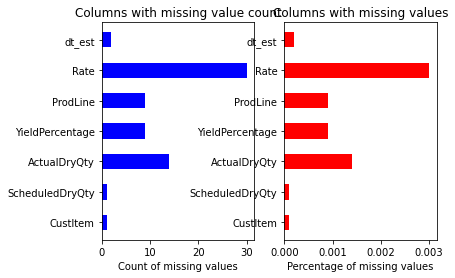

['CustItem', 'ScheduledDryQty', 'ActualDryQty', 'YieldPercentage', 'ProdLine', 'Rate', 'dt_est'] <class 'list'>
These ['CustItem', 'ScheduledDryQty', 'ActualDryQty', 'YieldPercentage', 'ProdLine', 'Rate', 'dt_est'] columns still have missing data
After dropping na, 9970 rows has decreased to 9931 rows
we will only drop too large outliers
We have 15 data points are outliers, which between 136.0 and 864.9
After drop outlier, the YieldPercentage column remain range between 0.0 and 130.0
**************************************** End clean_data() with 3.5837 second ****************************************

OVER


In [311]:
# from class_31_hyperparameters import HyperParamters
# from class_32_import_data import ImportData
# from class_34_preprocess import PreProcess
# from class_33_eda import EDA

def main():
    """
    We use this function to call process one by one.
    """


    # ***********************import******************************
    class_import = ImportData()
    # df_product, df_nj_weather, df_pa_weather = class_import.import_data()
    df_product, df_nj_weather, df_pa_weather = class_import.read_csv()

    # *******************3.Preprocess**************************************
    class_pre = PreProcess()
    df_product, df_nj_weather, df_pa_weather, df_dropped, df_outlier = class_pre.clean_data(df_product,
                                                                                df_nj_weather,
                                                                                df_pa_weather)


    return df_product, df_nj_weather, df_pa_weather, df_dropped

if __name__=="__main__":
    """:arg
    
    """
    (df_product, df_nj_weather, df_pa_weather, df_dropped) = main()

    print("OVER")

# <a id="9.Test Code">9.Test Code</a>
<a href="#2.Table of Contents">Click this Link back to Top</a>

1. We might need split data into two place NJ and PA, but we also can try to merge two location into one, because they are not far away
2. clean data, transform date format, join by date, Coeffience anaylsis
3. Check kaggle format
4. Check journals 

In [212]:
# solve statistical problem
from scipy import stats
import seaborn as sns